### Sentiment Classification Using My Own Construction and Naive Bayes

In [1]:
randomno=244816


In [2]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\the-e\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\the-e\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\the-e\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\the-e\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)                       
 

def get_train_test_data():
    
    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')
   
    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]
   
    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [4]:
random.seed(randomno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['there', 'was', 'a', 'huge', 'crowd', '-', 'so', ...], 'pos')


## 1  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why



Before continuing with the following project please make sure that you go to the "**cell"** drop down in jupyter $\rightarrow$ **current outputs** $\rightarrow$ **toggle scrolling**. This will display my graphs fully inline without creating a small scrollable display. Alternatively the shortcut is **shift-o**

In [5]:
#Need to ensure that words that carry context i.e stopwords are removed
stop = stopwords.words("english") #suitable for multiple language- englihs picked
lemm = WordNetLemmatizer()
def normalise(text):
    nopunc = [word for word in text if word.isalpha()]
    filterstop=[words for words in nopunc if words not in stop]
    filtered = [lemm.lemmatize(filters) for filters in filterstop]
    return filtered
#removing irrelevant words

In [6]:
training_norm=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in training_data]
# split the data into labels
testing_norm=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in testing_data]
training_norm[0][1] #checking where the label is placed

'pos'

In [7]:
poslist = []
neglist = []

for i in range(len(training_norm)): #iterating through every split list
    if training_norm[i][1] == "pos":
        for word in training_norm[i][0]: #to append the independent words
            poslist.append(word)
    else:
        for word in training_norm[i][0]: #same as above if word not pos then = neg
            neglist.append(word)

In [8]:
neglistfreq = FreqDist(neglist)
neglistfreq.most_common(10)

[('film', 624),
 ('one', 622),
 ('movie', 602),
 ('like', 544),
 ('character', 498),
 ('get', 480),
 ('time', 473),
 ('even', 470),
 ('make', 460),
 ('good', 418)]

In [9]:
poslistfreq = FreqDist(poslist)
poslistfreq.most_common(10)

[('film', 641),
 ('one', 632),
 ('movie', 558),
 ('like', 513),
 ('time', 509),
 ('character', 504),
 ('make', 466),
 ('get', 454),
 ('even', 438),
 ('also', 423)]

In [10]:
posdifferencelistfreq = poslistfreq - neglistfreq
pos_freq_diff= posdifferencelistfreq.most_common(10)
print(pos_freq_diff)

[('also', 102), ('life', 97), ('performance', 95), ('world', 83), ('quite', 83), ('best', 81), ('great', 76), ('perfect', 74), ('many', 70), ('others', 70)]


In [11]:
negdifferencelistfreq=neglistfreq-poslistfreq
neg_freq_diff = negdifferencelistfreq.most_common(10)
print(neg_freq_diff)

[('bad', 181), ('worst', 118), ('plot', 109), ('nothing', 94), ('boring', 84), ('unfortunately', 77), ('minute', 77), ('supposed', 77), ('script', 74), ('stupid', 74)]


The task of generating content words for postivie and negative reviews firstly required removal of irrelvant words,stopwords. These words are irrelvant in the text and they account for roughly 50% of general sentences. These have no sentiment and cannot be included in data as they would easily outnumber any of the real "sentimental" words such as "bad" or "great". I did this in the first function where I originally removed all punctuation from the text using the .isalpha() attribute inside of a for loop which created a list of "word" that are only added to a new list "nopunc" if and only if all the characters in the "word" arealphabetical letters. Then the nopunc list was used where only "words" that are in nopunc are not in the stopword list "stop". - If this was not done then the most common words would yield a very different result. The lemmatizer was also used here to group together different variations of the same word. This changes the result as it gives the "root" word used. i.e someone who said "movie" and "movies" would give two different values in the list- lemmatizing turns this into just "movie".

The training data was put through to generate the training_norm set. This data is labled into two section from the trainng data. This is done to put the postive and negative comments into a nested set, allowing for easier extraction of the postive and negative key words. I performed a test of training_norm[0][1] to view the data set's "label".

Further on I created an empty list of postive words and negative words which I then appended items into with a filter. using a for loop for the entire samples data set (using len function here) I was able to iterate though the entire list of training norms and using the tested function detailed in the last paragraph i knew how the data was "labled" and thus I was able to only append the items in the list if the second column item was exactly equal to "pos". This allowed me to isoalte the two instance of postive and negative data. Hence creating two lists "poslist" and "neglist"

Then a negativelistfreq variable was initited using the FreqDist import with the input neglist. This generated a frequency distribution dictionary which essentially counts all of the instances of a word appearing in the list.
then the .most_common(10) attribute was used to find the values which had the most occurences.

Finally through subtraction of negative from postive showed the biggest difference of postive words from negative and through subtraction of positive words from negative words gave the words that occured vastly in negative reviews.

## 2
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.



In [12]:
my_pos_word_list = []
for i in range(10):
    [my_pos_word_list.append(pos_freq_diff[i][0])]
print(my_pos_word_list)

['also', 'life', 'performance', 'world', 'quite', 'best', 'great', 'perfect', 'many', 'others']


In [13]:
my_neg_word_list = []
for i in range(10):
    [my_neg_word_list.append(neg_freq_diff[i][0])]
print(my_neg_word_list)

['bad', 'worst', 'plot', 'nothing', 'boring', 'unfortunately', 'minute', 'supposed', 'script', 'stupid']


In [173]:
from nltk.classify.api import ClassifierI
import random

class SimpleClassifier(ClassifierI): 

    def __init__(self, pos, neg): 
        self._pos = pos 
        self._neg = neg 

    def classify(self, words):
        score = 0
        #This will put the word list into either a positive or negative sub list
        for word in words:
            if lemm.lemmatize(word) in self._pos:
                score += 1
            if lemm.lemmatize(word) in self._neg:
                score -= 1
            else:
                score += 0
        
        if score <0:
            return "neg"
        elif score >0:
            return "pos"
        #else:
            #choices = ["pos","neg"]
            #return random.choice(choices)


    def labels(self): 
        return ("pos", "neg")


In [174]:
classifier = SimpleClassifier(my_pos_word_list, my_neg_word_list)
classifier.classify("I loved all the performances".split())

'pos'

In [175]:
classifier.classify("movie".split())

In [176]:
#checking that a 0 sum gives a random choice
for i in range(10):
    print(classifier.classify("This movie was also bad".split()))

None
None
None
None
None
None
None
None
None
None


Firstly I needed a positive word list that is easy to filter through. I turned the positive frequency difference dictionary into a word list with only the words in that frequency being appended. This was also done to the negative words giving me two lists that cna be used in the classifier to dictate whether an inserted sentence has either a positive or negative summed score.

Creating the class was simple as done in previous labs, an initialisation of self was defined as the first instance of the class. Where self is the collection of words. Here it is the sentence we are trying to find the sentiment of. This has two results - either it will be in the positive category of the negative category.

The next define function is where the text score is summed up. With self still being a key attribute in the definition. Here it has inherited the self._pos and self._neg. Looking into the code it is clear to see that all that is happening is the text is getting a simple summation of the words weight for if the word has been defined in the positive group then each occurence of that words will +1 to the summed score. Similarily each instance of a negative word will add -1 to the summed score. Words that hold no weight will add nothing to the score. The words used here have also been lemmatized since the positive and negative word list are lemmatized version it would make sence to use lemmatizer here aswell. This removes i.e a plural of a word not classified into positive or negative.

Once the entire score has been summed up- we are returned a string of either telling us that the sentiment is "neg" or "pos". Where the overall weight of the inserted text is 0 i have used a random choice of either positive or negative. Finally this was checked with a few instances of the result as seen above.

The lemmatiser of the word has been checked on the first sentence. "performances" was used given that i knew performace was a highly postive sentimental word.



## 3
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).



In [177]:
class ConfusionMatrix:
    def __init__(self,predictions,goldstandard,classes=("pos","neg")):
    
        (self.c1,self.c2)=classes #c1,c2 are subclasses for the "pos","neg" lists
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0
        for p,g in zip(predictions,goldstandard): #isolating prediction and actual values
            if g==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1
        # adds to the relevant metric we want
            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1
        
    #below are general definitions of metrics
    def precision(self):     
        p = self.TP / (self.TP + self.FP)
        return p
  
    def recall(self):
        r= self.TP /(self.TP +self.FN)
        return r
  
    def f1(self):
        p = self.precision()
        r = self.recall()
        f1= 2*p*r /(p+r)
        return f1 
    
    def accuracy(self):
        a=(self.TP+self.TN)/(self.TP+self.FP+self.TN+self.FN)
        return a
    
    def workout(self, get):
        #method to find the specifc nmetric that we want to find
        if get== "precision":
            return self.precision()
        if get== "recall":
            return self.recall()
        if get== "f1":
            return self.f1()
        if get== "accuracy":
            return self.accuracy()
    

In [19]:
#t_f = [wordlist for (wordlist, label) in training_norm]  # words of testing data
#t_l = [label for (wordlist, label) in training_norm]  # labels of test data
#t_l_pr = [classifier.classify(f) for f in t_l_pr]  # predicted labels of test data
#cm = nltk.ConfusionMatrix(t_l, t_l_pr)

In [178]:
docs,labels=zip(*testing_norm)
cm=ConfusionMatrix(classifier.classify_many(docs),labels)

* Accuracy:
\begin{eqnarray*} 
A =\frac{TP + TN}{TP +TN +FP +FN}
\end{eqnarray*}
* Precision: 
\begin{eqnarray*}
P=\frac{TP}{TP+FP}
\end{eqnarray*}
* Recall: 
\begin{eqnarray*}
R=\frac{TP}{TP+FN}
\end{eqnarray*}
* F1-score: 
\begin{eqnarray*}
F1 = \frac{2\times P\times R}{P+R}
\end{eqnarray*}


In [179]:
A = cm.workout("accuracy")
P = cm.workout("precision")
R= cm.workout("recall")
F1= cm.workout("f1")

In [180]:
print("The Accuracy of the test :{:.3f}%".format(A*100))
print("The Precision of the test:{:.3f}%".format(P*100))
print("The Recall of the test:{:.3f}%".format(R*100))
print("The F1-score of the test:{:.3f}%".format(F1*100))

The Accuracy of the test :73.833%
The Precision of the test:70.487%
The Recall of the test:82.000%
The F1-score of the test:75.809%


In [23]:
#confusion class here maybe

Using the training_data with utilisation of the nltk.ConfusionMatrix feature I was able to simply create the confusion matrix. t_f is the training features which is a list of the lists that are in the training normal data. This is the reviews without their corresponding labels which indicate whether they are positive or negative reviews.

Their corresponding labels are saved in the t_l variable. This is also a list of only "pos" or "neg" string as elements of the list.

Using the classifier.classify class as designed and implemented in the previous section I had created a new variable called t_l_pr (test label prediction) which is another list that has an element of either "pos" or "neg" in the same index as the training label. The training label here is the real review and the training label prediction is what category my classifer has analysed the feature to be either "pos" or "neg"

#### B) 
Accuracy is a not a great tool to use here as the classes are **unbalanced** It does not distinguish between the number of correctly classified examples of different classes and hence it often leads to inaccurate conclusions. $\implies$ High accuracy does not mean that we have a good performace on predicting a specific label.

An example of this is the email spam or not spam classification. The spam count if usually very low than the number of not spam and thus the two classes lead to imbalanced data. We can reduce the restriction on the classifier for spam emails that always predicts emails as not spam. This will yield a higher accuracy, however this is the accuracy paradox where TP <FP. Accuracy always increases when a classification rule is strictly always negative. Conversely where TN < FN the same thing happens with the classifciation of always positive. This is why we don't use accuracy as it would lead to the false assumption that one classificer model is superior to another. Precision and recall to the rescue!

The accuracy is a good metric to use when we are interested in the True Positives and True Negatives, although F1 score is used when these two above are of crutial importance.

## 4
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results. 



In [24]:
from nltk.classify import NaiveBayesClassifier
import nltk.metrics


In [249]:
docs,labels = zip(*training_norm)

In [182]:
naivebayes = nltk.NaiveBayesClassifier.train(training_norm)
# from the nltk library
A_2 = nltk.classify.accuracy(naivebayes,testing_norm) 

In [183]:
# use of confuction matrix class as before to calculate the metrics
cm_2 = ConfusionMatrix(naivebayes.classify_many(docs),labels)
P_2= cm_2.workout("precision")
R_2= cm_2.workout("recall")
F1_2= cm_2.workout("f1")

In [184]:
print("The Accuracy of the test :{:.3f}%".format(A_2*100))
print("The Precision of the test:{:.3f}%".format(P_2*100))
print("The Recall of the test:{:.3f}%".format(R_2*100))
print("The F1-score of the test:{:.3f}%".format(F1_2*100))

The Accuracy of the test :72.000%
The Precision of the test:99.432%
The Recall of the test:100.000%
The F1-score of the test:99.715%


In [185]:
compare = {} #creating empty diction to add through the two results and comapre
compare["Comparison"] =["Accuracy","Precision","Recall","F1"]
compare["Word Llist Classifier"]= [A,P,R,F1]
compare["Naive Bayes Classifier"]= [A_2,P_2,R_2,F1_2]

In [186]:
df = pd.DataFrame(compare) # data frame to make it easy to view
display(df)

,Comparison,Word Llist Classifier,Naive Bayes Classifier
0,Accuracy,0.738333,0.720000
1,Precision,0.704871,0.994318
2,Recall,0.820000,1.000000
3,F1,0.758089,0.997151


Both Word List Classifier and Naive Bayes Classifer have a similar accuracy implies that they are similar at correctly obtaining the predicted data points, this measure is how much the result conforms to our predicted standard, a 2% difference doesn't mean anything so they are both as accurate as eachother. 

The naive bayes algorith is alot higher than the Word list Classifier, with a almost 100% precision this is an excellent result. This implies that the classifier will return more relevant results than the irrlevant ones. This indicates that the number of positive class prediction that are actually positive is very high. In the word list classifier alot of positive classes can be predicted as negative - roughly every 1 in 10 being falsely labled compared to the Naive Bayes Classifier where this error almost never occurs.

Recall (sensetivity) is 100% for the Naive Bayes Classifier and this is due to the formula when Recall = 1 this implies that numerator = denominator and therefore TP=TP+FN. Here the number of FN (False Negatives) =0 implying that there have been no miss labled positive reviews as negative.

F1 score is the weighed average of the Precision and Recall a high value here indicates that the values FP and FN are low. A F1 score of 0.997 is excellent and definatly implies that the Naive Bayes is a better classifier compared to the 0.745 of the Word List. Since Bayes Classifier has high precision and recall this is why the f1 score is so highly rated, conversely the opposite for Word List Classifier.

Overall the performance of the Naive Bayes Classifier is much better than the Word List with the Word List providing wrong labels quite a lot of the time. Here the F1 score is the best metric for us to use as our training data is imbalanced.

## 5
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions. 

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.




To compare the impact of wordlist length on the accuracy,precision, recall and F1-score. To do so I will create a function which has an input of n (the number of words in the Word List to classify my text). This will return out a dictionary of accuracy, precision, recall and f1 score for the respective length of the Word List, namely n.

In [187]:
def impact(n,poslistfreq=poslistfreq,neglistfreq=neglistfreq,testing=testing_norm):
    posdifference = poslistfreq - neglistfreq
    negdifference = neglistfreq - poslistfreq
    pos_freq_diff= posdifference.most_common(n)
    neg_freq_diff = negdifference.most_common(n)
    my_pos_word_list = []
    my_neg_word_list = []
    for i in range(n):
        my_neg_word_list.append(neg_freq_diff[i][0])
        my_pos_word_list.append(pos_freq_diff[i][0])
    classifier = SimpleClassifier(my_pos_word_list, my_neg_word_list)
    docs,labels=zip(*testing)
    cm=ConfusionMatrix(classifier.classify_many(docs),labels)
    A = cm.workout("accuracy")
    P = cm.workout("precision")
    R= cm.workout("recall")
    F1= cm.workout("f1")
    mydict = {"Accuracy":A,"Precision":P,"Recall":R,"F1":F1}
    return mydict

Now that the impact function has been written - it is necessary to create all the instances of impact. These will be the resultant dictionaries that are returned from the impact function. Below I have looked at the difference instances of the length of the wordlist classifier, then after the relevant "keys" from the dictionarys have been added to a new dictionary which takes only either accuracy, precision, recall or F1 from the impact function.

In [194]:
wordlist_len5=impact(5)
wordlist_len10=impact(10)
wordlist_len15=impact(15)
wordlist_len20=impact(20)
wordlist_len25=impact(25)
wordlist_len30=impact(30)

In [195]:
print(wordlist_len5)
print(wordlist_len10)
print(wordlist_len15)
print(wordlist_len20)
print(wordlist_len25)
print(wordlist_len30)

{'Accuracy': 0.6833333333333333, 'Precision': 0.6751592356687898, 'Recall': 0.7066666666666667, 'F1': 0.6905537459283387}
{'Accuracy': 0.7383333333333333, 'Precision': 0.7048710601719198, 'Recall': 0.82, 'F1': 0.7580893682588598}
{'Accuracy': 0.7233333333333334, 'Precision': 0.6700507614213198, 'Recall': 0.88, 'F1': 0.760806916426513}
{'Accuracy': 0.7083333333333334, 'Precision': 0.6506024096385542, 'Recall': 0.9, 'F1': 0.7552447552447552}
{'Accuracy': 0.7133333333333334, 'Precision': 0.6576354679802956, 'Recall': 0.89, 'F1': 0.7563739376770539}
{'Accuracy': 0.7283333333333334, 'Precision': 0.6683046683046683, 'Recall': 0.9066666666666666, 'F1': 0.7694483734087695}


In [203]:
accuracydic={"Accuracy": [wordlist_len5["Accuracy"] , wordlist_len10["Accuracy"] , wordlist_len15["Accuracy"],
                  wordlist_len20["Accuracy"], wordlist_len25["Accuracy"] ,wordlist_len30["Accuracy"]] for key in accuracydic}
precisiondic={"Precision": [wordlist_len5["Precision"] , wordlist_len10["Precision"] , wordlist_len15["Precision"],
                  wordlist_len20["Precision"], wordlist_len25["Precision"] ,wordlist_len30["Precision"]] for key in precisiondic}
recalldic={"Recall": [wordlist_len5["Recall"] , wordlist_len10["Recall"] , wordlist_len15["Recall"],
                  wordlist_len20["Recall"], wordlist_len25["Recall"] ,wordlist_len30["Recall"]] for key in recalldic}
f1dic={"F1": [wordlist_len5["F1"] , wordlist_len10["F1"] , wordlist_len15["F1"],
                  wordlist_len20["F1"], wordlist_len25["F1"] ,wordlist_len30["F1"]] for key in f1dic}
lengths={"Lengths": [5,10,15,20,25,30]}

The code above takes care of sorting the results from each of the wordlist_len dictionaries into their appropriate categories.

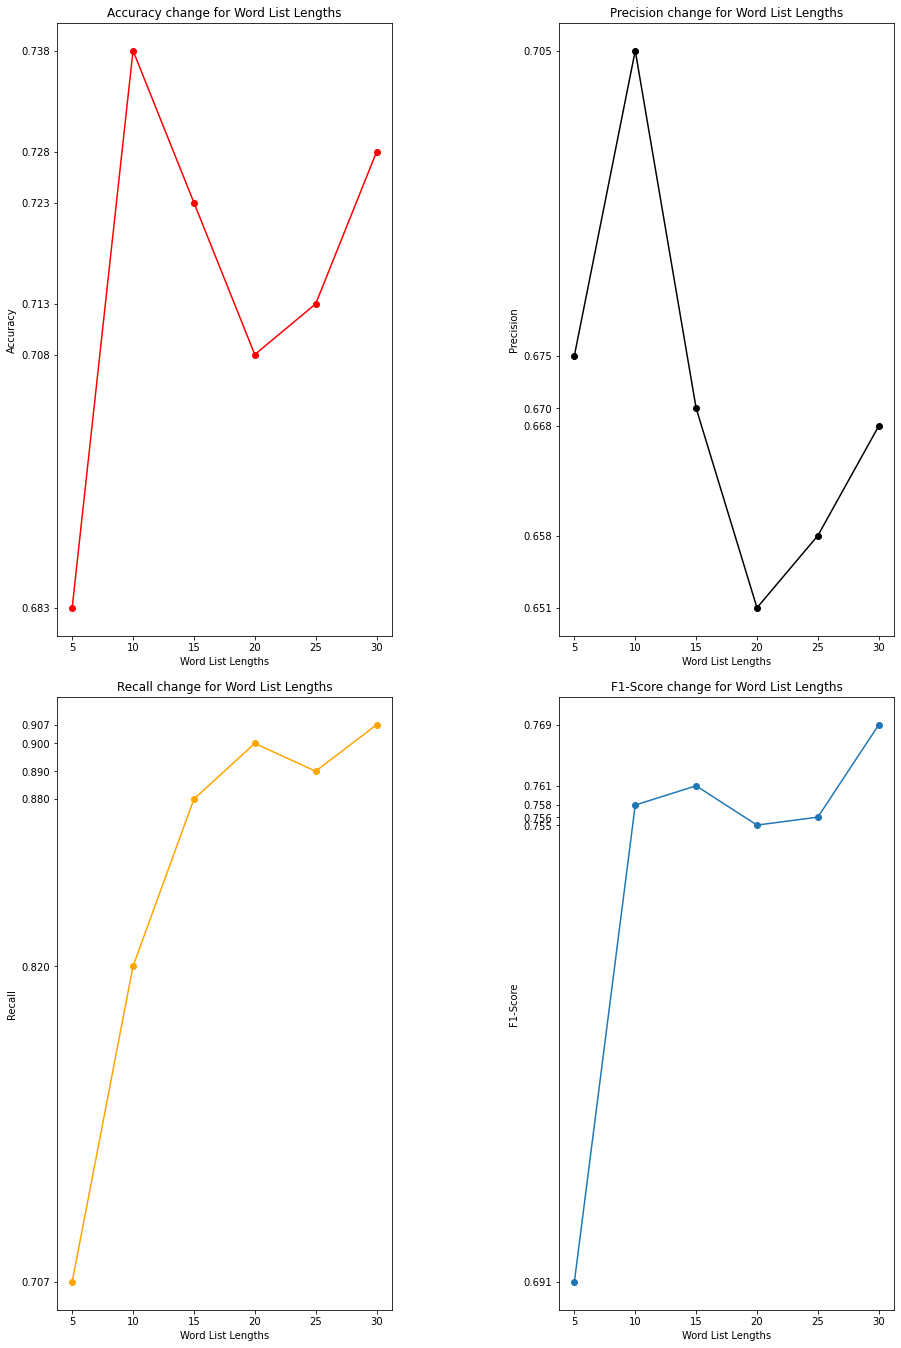

In [246]:
from matplotlib.ticker import FormatStrFormatter

fig, axs = plt.subplots(2,2,figsize=(15,13)) #creates 4 different subplots
axs[0,0].plot((lengths["Lengths"]),(accuracydic["Accuracy"]),color="red", marker= "o") 
#plotting the legths against resultatn accuracy, changing colour and creating a marker at the specific results
axs[0,0].set_title("Accuracy change for Word List Lengths")
axs[0,0].set_xlabel("Word List Lengths")
axs[0,0].set_ylabel("Accuracy")
axs[0,0].set_xticks(lengths["Lengths"]) # mark corresponding values from lengths dictionary
axs[0,0].set_yticks(accuracydic["Accuracy"])#removes a generic plot of y axis values and specifies the y markers as results from accuracy dictionary
axs[0,0].yaxis.set_major_formatter(FormatStrFormatter("%.3f")) #setting y axis to have 3 significant figures for the result

# below I mapped the other graphs with the same features as above.
axs[0,1].plot((lengths["Lengths"]),(precisiondic["Precision"]),color="black", marker= "o")
axs[0,1].set_title("Precision change for Word List Lengths")
axs[0,1].set_xlabel("Word List Lengths")
axs[0,1].set_ylabel("Precision")
axs[0,1].set_xticks(lengths["Lengths"])
axs[0,1].set_yticks(precisiondic["Precision"])
axs[0,1].yaxis.set_major_formatter(FormatStrFormatter("%.3f")) 

axs[1,0].plot((lengths["Lengths"]),(recalldic["Recall"]),color="orange", marker= "o")
axs[1,0].set_title("Recall change for Word List Lengths")
axs[1,0].set_xlabel("Word List Lengths")
axs[1,0].set_ylabel("Recall")
axs[1,0].set_xticks(lengths["Lengths"])
axs[1,0].set_yticks(recalldic["Recall"])
axs[1,0].yaxis.set_major_formatter(FormatStrFormatter("%.3f")) 

axs[1,1].plot((lengths["Lengths"]),(f1dic["F1"]), marker= "o")
axs[1,1].set_title("F1-Score change for Word List Lengths")
axs[1,1].set_xlabel("Word List Lengths")
axs[1,1].set_ylabel("F1-Score")
axs[1,1].set_xticks(lengths["Lengths"])
axs[1,1].set_yticks(f1dic["F1"])
axs[1,1].yaxis.set_major_formatter(FormatStrFormatter("%.3f")) 

plt.subplots_adjust(top=1.5, hspace=0.1, wspace=0.5)


To conclude, every metric except the precision has improved from the extension of the word list classifier. This make sense as there are more classifiers to determin whether text has positive or negative sentiment. If we are keen to keep precision as high as possible then a word list of length 10 needs to be selected. However the difference between a 30 and 10 word list classifier in regards to precision is only $\approx$ 4% which would not drastically impact the result, given that F1-Score is the most popular metric it has increased with nearly every increased size of the wordlist length increase. This is great news as it means that we will get better and better classifications which will entail that our classifier is better at classifcation of sentiment.

Naive bayes classification is better at text classification than my word list classifier. This is because it has repeated higher scores for each of the metrics. Additionally if there are multiple classes. Since we have indepedence in our class this implies that the Naive Bayes quickly converge and would in turn require less training data. This also achieved much greater computational efficiency. This means that for very large data sets the Naive Bayes method is very efficient.  Naive Bayes can be used to make predictions in real time which is a huge advantage to the given topic. With the word list classifier when we get more and more data then the training data needs to be adjusted and a new wordlist needs to be recalculated. This is a dissadvantage of using the wordlist classifier.

In [247]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437

import io
from nbformat import current

filepath="Sentiment Classification.ipynb"
question_count=437

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 1677
